# Octavemagic: Octave (MATLAB) inside IPython
## Installation

The octavemagic extension provides the ability to interact with Octave. It is provided by the oct2py package, which may be installed using pip or easy_install.

`sudo pip install oct2py`

To enable the extension, load it as follows:

In [1]:
%load_ext oct2py.ipython

## Overview

Loading the extension enables three magic functions: %octave, %octave_push, and %octave_pull.

The first is for executing one or more lines of Octave, while the latter allow moving variables between the Octave and Python workspace. Here you see an example of how to execute a single line of Octave, and how to transfer the generated value back to Python:


In [2]:
x = %octave [1 2; 3 4];
x

array([[ 1.,  2.],
       [ 3.,  4.]])

In [4]:
a = [1, 2, 3]

%octave_push a
%octave a = a * 2;
%octave_pull a
a

array([[ 2.,  4.,  6.]])

## Multiple lines
When using the cell magic, %%octave (note the double %), multiple lines of Octave can be executed together. Unlike with the single cell magic, no value is returned, so we use the -i and -o flags to specify input and output variables. Also note the use of the semicolon to suppress the Octave output.


In [5]:
%%octave -i x -o U,S,V
[U, S, V] = svd(x);

In [6]:
print(U, S, V)

(array([[-0.40455358, -0.9145143 ],
       [-0.9145143 ,  0.40455358]]), array([[ 5.4649857 ,  0.        ],
       [ 0.        ,  0.36596619]]), array([[-0.57604844,  0.81741556],
       [-0.81741556, -0.57604844]]))


## Plotting
Plot output is automatically captured and displayed, and using the -f flag you may choose its format (currently, png and svg are supported).

12*x^4 - 2.5*x^3 - 8*x^2 - 0.1*x^1 + 8

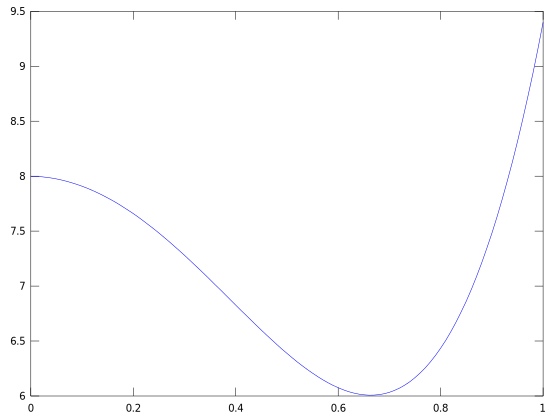

In [7]:
%%octave -f svg

p = [12 -2.5 -8 -0.1 8];
x = 0:0.01:1;

polyout(p, 'x')
plot(x, polyval(p, x));

The width or the height can be specified to constrain the image while maintaining the original aspect ratio.

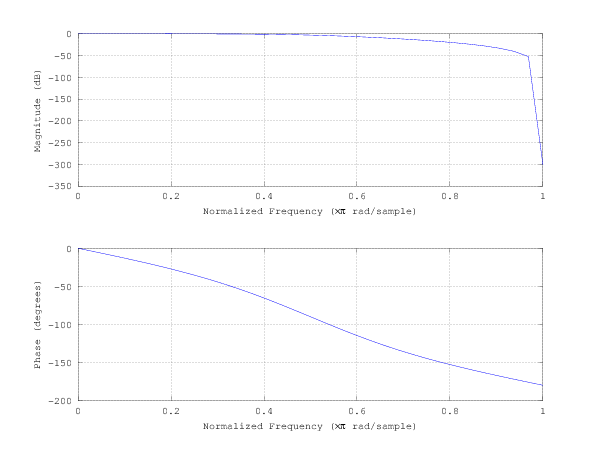

In [8]:
%%octave -f png -w 600

% butterworth filter, order 2, cutoff pi/2 radians
b = [0.292893218813452  0.585786437626905  0.292893218813452];
a = [1  0  0.171572875253810];
freqz(b, a, 32);

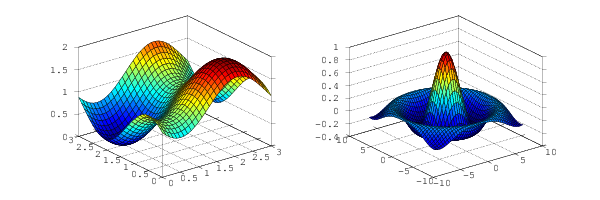

In [3]:
%%octave -s 600,200 -f png

% Note: On Windows, this will not show the plots unless Ghostscript is installed.

subplot(121);
[x, y] = meshgrid(0:0.1:3);
r = sin(x - 0.5).^2 + cos(y - 0.5).^2;
surf(x, y, r);

subplot(122);
sombrero()

Multiple figures can be drawn. Note that when using imshow the image will be created as a PNG with the raw image dimensions.

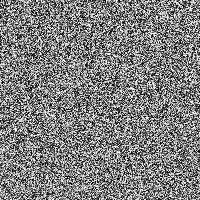

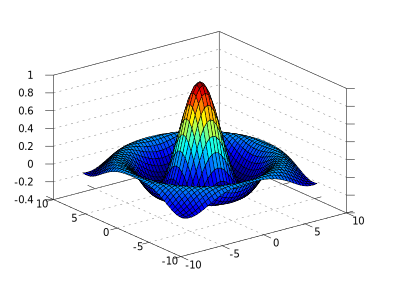

In [9]:
%%octave -f svg -h 300
sombrero
figure
imshow(rand(200,200))

Plots can be drawn inline (default) or bring up the Octave plotting GUI by using the -g (or --gui) flag:

In [10]:
%%octave -g
plot([1,2,3])
# brings up an Octave plotting GUI